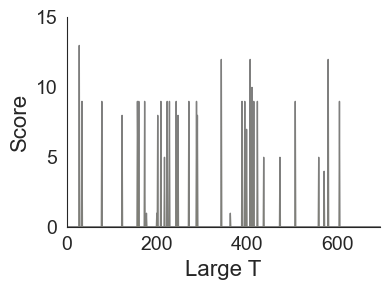

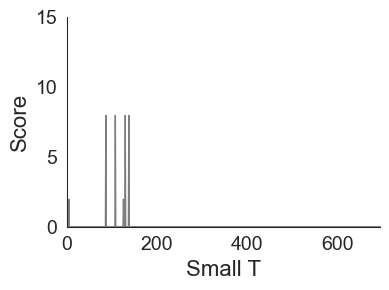

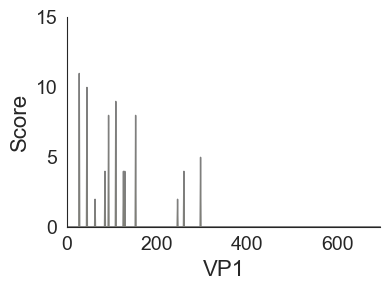

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# read in epitope sequences file
epitopes = pd.read_excel('BKV epitope lengths.xlsx')

# read in protein sequences file
proteins = pd.read_excel('BKV protein lengths.xlsx')

# merge epitopes and proteins based on protein ID column
merged_df = pd.merge(epitopes, proteins, on='protein name')

# get the maximum protein length
max_protein_length = merged_df['protein sequence'].str.len().max()

# loop through each protein in merged_df
for protein in merged_df['protein name'].unique():
    # filter merged_df to only include rows with the current protein
    protein_df = merged_df[merged_df['protein name'] == protein]

    # get the protein sequence and length
    protein_seq = protein_df['protein sequence'].iloc[0]
    protein_length = len(protein_seq)

    # calculate the epitope score at each position in the protein sequence
    y = []
    for i in range(max_protein_length):
        if i < protein_length:
            score = 0
            count = 0
            for epitope_seq, epitope_score in zip(protein_df['epitope sequence'], protein_df['score']):
                if protein_seq[i:i+len(epitope_seq)] == epitope_seq:
                    score += epitope_score
                    count += 1
            if count > 0:
                y.append(score / count)
            else:
                y.append(0)
        else:
            y.append(0)

    # create a new figure
    plt.figure(figsize=(4,3))
    sns.set_style("white")

    # create the area plot
    x = np.arange(max_protein_length)
    cmap = plt.cm.get_cmap('YlGnBu')
    colors = cmap(y)
    plt.stackplot(x, y, colors=colors, alpha=0.5, edgecolor='black')

    # set the title and axis labels
    plt.xlabel(f'{protein}', fontsize = 16)
    plt.ylabel('Score', fontsize = 16)
    plt.ylim(0, 15)
    plt.xlim(0, max_protein_length - 1)
    

    # remove the top and right spines
    sns.despine(top=True, right=True)
    ax = plt.gca()
    
    # increase tick label font size
    ax.tick_params(axis='both', which='major', labelsize=14)

    # show the plot
    plt.tight_layout()
    plt.show()